In [101]:
import numpy as np
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import os
from scipy.stats import reciprocal

### Perceptions

In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

## Image calssificator

In [3]:
print(tf.__version__)
print(keras.__version__)

2.12.0-rc0
2.12.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

We scale dataset in order to have simpler colors (0 and 1) and extract validation set

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Example image

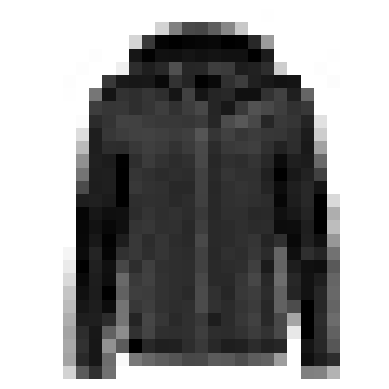

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Define class names

In [9]:
class_names = ["T-shirt", "Trousers", "Sweater", "Dress", "Coat",
                  "Sandals", "Shirt", "Sneakers", "Handbag", "Shoes"]
class_names[y_train[0]]

'Coat'

In [10]:
print(f"X_valid shape: {X_valid.shape}")
print(f"X_test shape: {X_test.shape}")

X_valid shape: (5000, 28, 28)
X_test shape: (10000, 28, 28)


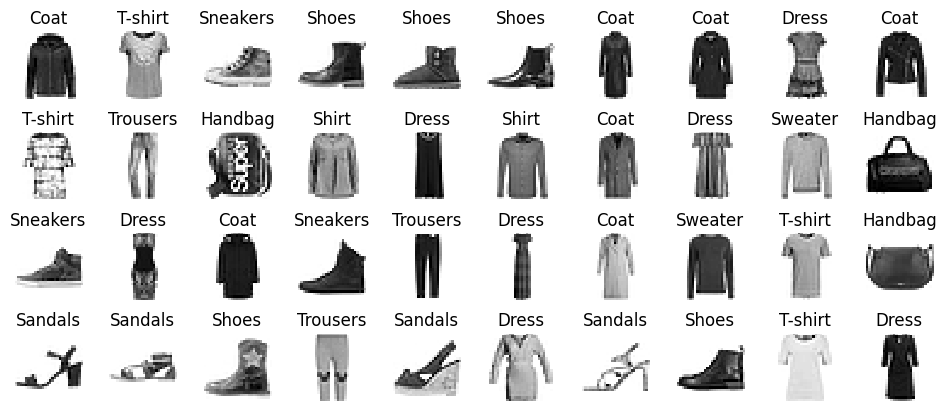

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

We can adding new layers like that: \
```python
    model = keras.models.Sequential() 
    model.add(keras.layers.Flatten(input_shape=[28, 28])) 
    model.add(keras.layers.Dense(300, activation="relu")) 
    model.add(keras.layers.Dense(100, activation="relu")) 
    model.add(keras.layers.Dense(10, activation="softmax")) 
```

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), # Flatten in order to reshape X to one-dim array (X.reshape(-1,1)); input shape - every image
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Vizualization of model

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Compile model

We can use it:
```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7281 - accuracy: 0.7638 - val_loss: 0.5091 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4911 - accuracy: 0.8292 - val_loss: 0.4466 - val_accuracy: 0.8456
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4455 - accuracy: 0.8438 - val_loss: 0.4537 - val_accuracy: 0.8446
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4172 - accuracy: 0.8548 - val_loss: 0.4016 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3978 - accuracy: 0.8596 - val_loss: 0.4429 - val_accuracy: 0.8450
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3815 - accuracy: 0.8655 - val_loss: 0.3952 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3684 - accuracy: 0.8683 - val_loss: 0.3679 - val_accuracy:

In [16]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

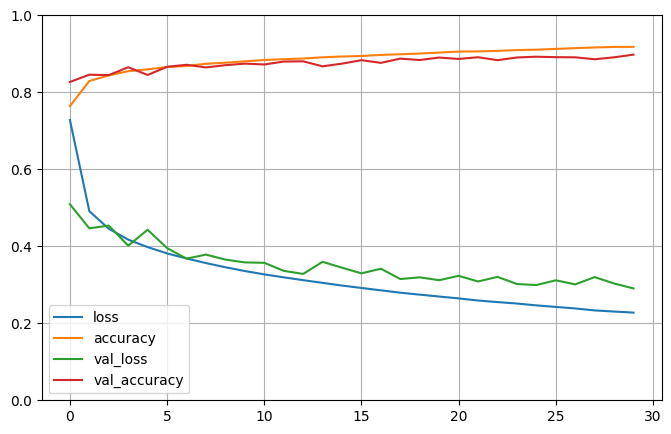

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # y asis in range (0,1)
plt.show()

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 898us/step - loss: 0.3244 - accuracy: 0.8837


[0.32440632581710815, 0.8837000131607056]

Predictions

In [19]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 59ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Predict classes

In [20]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 14ms/step


array([9, 2, 1], dtype=int64)

## Regression network

Dataset cointains only numerical values 

In [21]:
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [23]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), #dataset has big nois so we choose only one hidden layer
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9574 - val_loss: 11.6869
Epoch 2/20
363/363 [==============================] - 0s 839us/step - loss: 0.6303 - val_loss: 6.2421
Epoch 3/20
363/363 [==============================] - 0s 838us/step - loss: 0.4952 - val_loss: 2.0633
Epoch 4/20
363/363 [==============================] - 0s 837us/step - loss: 0.4301 - val_loss: 0.7714
Epoch 5/20
363/363 [==============================] - 0s 849us/step - loss: 0.4117 - val_loss: 0.3755
Epoch 6/20
363/363 [==============================] - 0s 842us/step - loss: 0.3992 - val_loss: 0.4325
Epoch 7/20
363/363 [==============================] - 0s 845us/step - loss: 0.3958 - val_loss: 0.3808
Epoch 8/20
363/363 [==============================] - 0s 838us/step - loss: 0.3886 - val_loss: 0.3681
Epoch 9/20
363/363 [==============================] - 0s 852us/step - loss: 0.3837 - val_loss: 0.3785
Epoch 10/20
363/363 [==============================] - 0s 845us/step - loss: 0.3802

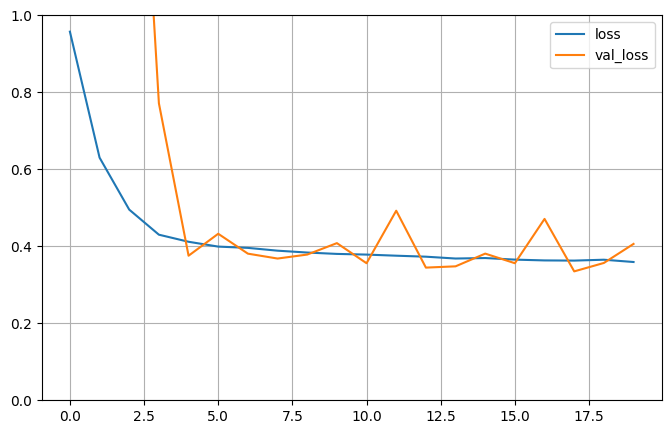

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # y asis in range (0,1)
plt.show()

## Functional Interface

Wide & Deep

In [38]:
np.random.seed(42)
tf.random.set_seed(42)

In [39]:
input_1 = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_1) # Deep
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) # Deep
concat = keras.layers.concatenate([input_1, hidden2]) # Wide
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_1], outputs=[output]) # we decide which input/output we are going to use

In [40]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 30)           270         ['input_5[0][0]']                
                                                                                                  
 dense_18 (Dense)               (None, 30)           930         ['dense_17[0][0]']               
                                                                                                  
 concatenate_4 (Concatenate)    (None, 38)           0           ['input_5[0][0]',                
                                                                  'dense_18[0][0]']         

In [41]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6959 - val_loss: 0.5137
Epoch 2/20
363/363 [==============================] - 0s 894us/step - loss: 0.4461 - val_loss: 3.8587
Epoch 3/20
363/363 [==============================] - 0s 906us/step - loss: 0.5530 - val_loss: 0.4867
Epoch 4/20
363/363 [==============================] - 0s 890us/step - loss: 0.4006 - val_loss: 1.8217
Epoch 5/20
363/363 [==============================] - 0s 891us/step - loss: 0.3932 - val_loss: 3.1438
Epoch 6/20
363/363 [==============================] - 0s 885us/step - loss: 0.4314 - val_loss: 1.9600
Epoch 7/20
363/363 [==============================] - 0s 885us/step - loss: 0.5056 - val_loss: 7.7843
Epoch 8/20
363/363 [==============================] - 0s 915us/step - loss: 0.4152 - val_loss: 65.6457
Epoch 9/20
363/363 [==============================] - 0s 898us/step - loss: 0.5010 - val_loss: 36.4477
Epoch 10/20
363/363 [==============================] - 0s 889us/step - loss: 1.046

1/1 [==============================] - 0s 254ms/step


In [42]:
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
input_A = keras.layers.Input(shape=[5], name="input_short")
input_B = keras.layers.Input(shape=[6], name="input_deep")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [44]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8036 - val_loss: 5.9915
Epoch 2/20
363/363 [==============================] - 0s 919us/step - loss: 0.5590 - val_loss: 4.9270
Epoch 3/20
363/363 [==============================] - 0s 917us/step - loss: 0.5057 - val_loss: 0.4387
Epoch 4/20
363/363 [==============================] - 0s 926us/step - loss: 0.4266 - val_loss: 0.4496
Epoch 5/20
363/363 [==============================] - 0s 907us/step - loss: 0.4151 - val_loss: 0.4342
Epoch 6/20
363/363 [==============================] - 0s 911us/step - loss: 0.4018 - val_loss: 0.4379
Epoch 7/20
363/363 [==============================] - 0s 918us/step - loss: 0.4011 - val_loss: 0.4232
Epoch 8/20
363/363 [==============================] - 0s 922us/step - loss: 0.3914 - val_loss: 0.4148
Epoch 9/20
363/363 [==============================] - 0s 914us/step - loss: 0.3853 - val_loss: 0.4106
Epoch 10/20
363/363 [==============================] - 0s 944us/step - loss: 0.3815 

1/1 [==============================] - 0s 45ms/step


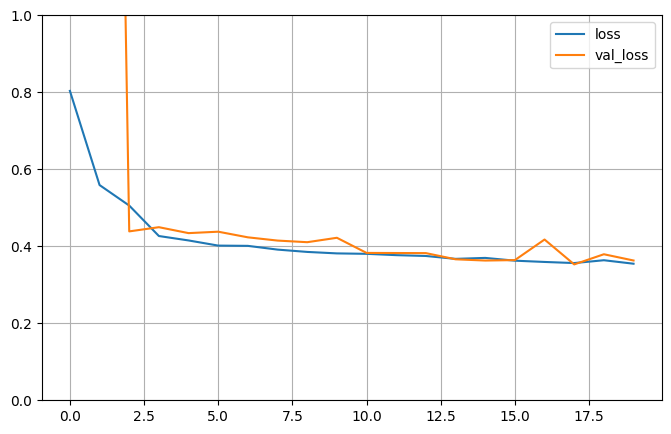

In [45]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # y asis in range (0,1)
plt.show()

Adding extra output

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
input_A = keras.layers.Input(shape=[5], name="wejscie_krotkie")
input_B = keras.layers.Input(shape=[6], name="wejscie_glebokie")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="extra_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [54]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [55]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.3152 - main_output_loss: 2.0519 - extra_output_loss: 4.6845 - val_loss: 2.6670 - val_main_output_loss: 1.5770 - val_extra_output_loss: 12.4769
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9753 - main_output_loss: 0.7539 - extra_output_loss: 2.9682 - val_loss: 2.1713 - val_main_output_loss: 0.9170 - val_extra_output_loss: 13.4600
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7650 - main_output_loss: 0.6233 - extra_output_loss: 2.0405 - val_loss: 1.8249 - val_main_output_loss: 0.5987 - val_extra_output_loss: 12.8611
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6707 - main_output_loss: 0.5666 - extra_output_loss: 1.6075 - val_loss: 1.6183 - val_main_output_loss: 0.5322 - val_extra_output_loss: 11.3935
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6193 - main_output_loss: 0.5324 - extra_output_l

In [56]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 72ms/step


### Subclass Interface

In [57]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [59]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 0.4721 - output_1_loss: 0.4291 - output_2_loss: 0.8592 - val_loss: 0.6059 - val_output_1_loss: 0.5754 - val_output_2_loss: 0.8803
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4676 - output_1_loss: 0.4258 - output_2_loss: 0.8438 - val_loss: 0.5614 - val_output_1_loss: 0.5254 - val_output_2_loss: 0.8847
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4641 - output_1_loss: 0.4235 - output_2_loss: 0.8295 - val_loss: 0.5129 - val_output_1_loss: 0.4703 - val_output_2_loss: 0.8956
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4611 - output_1_loss: 0.4215 - output_2_loss: 0.8171 - val_loss: 0.5107 - val_output_1_loss: 0.4688 - val_output_2_loss: 0.8879
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4584 - output_1_loss: 0.4199 - output_2_loss: 0.8045 - val_loss: 0.4900 - val_output_1_loss: 0.4454 - val_ou

### Saving and loading models

Sequential

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [63]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4045 - val_loss: 2.3408
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3847 - val_loss: 1.5647
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3781 - val_loss: 1.1395
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3740 - val_loss: 0.9126
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3717 - val_loss: 0.7528
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3697 - val_loss: 0.6729
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3684 - val_loss: 0.6064
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3670 - val_loss: 0.5516
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3660 - val_loss: 0.5243
Epoch 10/10
162/162 [==============================] - 0s 868us/step - loss: 0.3616


In [64]:
model.save("model_keras_v1.h5")

In [65]:
model = keras.models.load_model("model_keras_v1.h5")

In [66]:
model.predict(X_new)

1/1 [==============================] - 0s 66ms/step


array([[0.75452197],
       [1.6588995 ],
       [3.8805695 ]], dtype=float32)

### Callbacks
In order to saving model during long training

In [67]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [70]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("model_keras_callbacks_v1.h5", save_best_only=True) # saving best model; only when validation_data are
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("model_keras_callbacks_v1.h5") # loads best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4078 - val_loss: 0.5076
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3962 - val_loss: 0.3767
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3909 - val_loss: 0.3665
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3873 - val_loss: 0.3897
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3848 - val_loss: 0.4062
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3824 - val_loss: 0.4206
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3803 - val_loss: 0.4358
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3784 - val_loss: 0.4263
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3766 - val_loss: 0.4336
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.3864


### Early Stopping

In [72]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3694 - val_loss: 1.0787
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3608 - val_loss: 0.7605
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3579 - val_loss: 0.5783
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3560 - val_loss: 0.5175
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3550 - val_loss: 0.4614
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3540 - val_loss: 0.4477
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3531 - val_loss: 0.4399
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3522 - val_loss: 0.4189
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3514 - val_loss: 0.4183
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3506 - val_lo

Define custom callbacks

In [75]:
class PrintValTrainRatioCallback(keras.callbacks.Callback): # we can add this in order to prevent overfitting
    def on_epoch_end(self, epoch, logs):
        print("\nvalidation/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/5
  1/363 [..............................] - ETA: 1s - loss: 0.4627WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0009s vs `on_train_batch_end` time: 0.0011s). Check your callbacks.


339/363 [===========================>..] - ETA: 0s - loss: 0.3314
validation/train: 1.15
363/363 [==============================] - 1s 2ms/step - loss: 0.3332 - val_loss: 0.3843
Epoch 2/5
360/363 [============================>.] - ETA: 0s - loss: 0.3332
validation/train: 1.20
363/363 [==============================] - 0s 1ms/step - loss: 0.3328 - val_loss: 0.3998
Epoch 3/5
348/363 [===========================>..] - ETA: 0s - loss: 0.3340
validation/train: 1.17
363/363 [==============================] - 0s 1ms/step - loss: 0.3325 - val_loss: 0.3891
Epoch 4/5
320/363 [=========================>....] - ETA: 0s - loss: 0.3303
validation/train: 1.19
363/363 [==============================] - 0s 1ms/step - loss: 0.3321 - val_loss: 0.3967
Epoch 5/5
330/363 [==========================>...] - ETA: 0s - loss: 0.3278
validation/train: 1.15
363/363 [==============================] - 0s 1ms/step - loss: 0.3317 - val_loss: 0.3825


### TensorBoard

In [85]:
root_logdir = os.path.join(os.curdir, "my_statistics")

In [86]:
def get_run_logdir():
    import time
    run_id = time.strftime("runtime_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_statistics\\runtime_2023_03_03-19_17_32'

In [87]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [88]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [89]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 2ms/step - loss: 2.2866 - val_loss: 1.4513
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7478 - val_loss: 0.7213
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6183 - val_loss: 0.5727
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5608 - val_loss: 0.6345
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5252 - val_loss: 0.5340
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4957 - val_loss: 0.4930
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4763 - val_loss: 0.4432
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4607 - val_loss: 0.4404
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4487 - val_loss: 0.4614
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4394 - val_loss: 0.4251

paste this to terminal in curr folder path: 
```bash
tensorboard --logdir=./my_statistics --port=6006
```
after that open in web:
```url
localhost:6006
```

### Hyperparameter Tuning

In [94]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [95]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [96]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\dawid\AppData\Local\Temp\ipykernel_7300\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [97]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.4619 - val_loss: 1.2046
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5715 - val_loss: 0.4993
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4964 - val_loss: 0.4541
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4572 - val_loss: 0.4323
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4368 - val_loss: 0.4237
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4253 - val_loss: 0.4467
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4190 - val_loss: 0.4570
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4145 - val_loss: 0.3957
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4105 - val_loss: 0.4371
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4076 - val_lo

In [98]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3843


In [99]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 52ms/step


In [100]:
np.random.seed(42)
tf.random.set_seed(42)

In [102]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid), # this only works to EarlyStopping, RandomizedSearch using cross-check validation
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 4.1926 - val_loss: 1.8170
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1654 - val_loss: 0.7995
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6890 - val_loss: 0.6440
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5948 - val_loss: 0.5882
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5721 - val_loss: 0.5721
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5618 - val_loss: 0.7788
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5603 - val_loss: 0.7176
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5563 - val_loss: 0.7336
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5554 - val_loss: 0.5549
Epoch 10/100
242/242 [========

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000020072C36F10>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000200702DDA10>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   verbose=2)

In [103]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [104]:
rnd_search_cv.best_score_

-0.34526367982228595

In [105]:
rnd_search_cv.best_estimator_

In [106]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3427


-0.3426731526851654

In [107]:
model = rnd_search_cv.best_estimator_.model
model